# Milestone1

# importing netflix movie and tv shows dataset from kaggle
import pandas as pd
df=pd.read_csv(r"C:\Users\saiga\Downloads\netflix_titles.csv\netflix_titles.csv")
df.head()
df.info()

In [146]:
#checking missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [174]:
# Handling Missing values
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['director'].fillna('Unknown',inplace=True)
df['cast'].fillna('Unknown',inplace=True)
df['duration'].fillna(df['duration'].mode()[0], inplace=True)
df['date_added'].fillna('not specified',inplace=True)
df.isnull().sum()

C:\Users\saiga\AppData\Local\Temp\ipykernel_26280\2888745227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
C:\Users\saiga\AppData\Local\Temp\ipykernel_26280\2888745227.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [170]:
#Remove Duplicates
df.drop_duplicates(inplace=True)
df.duplicated(subset=['title','release_year']).sum()

0

In [224]:
#Normalize categorical features such as genre,rating,country
    #genre normalization
df['genres'] = df['listed_in'].apply(lambda x: [i.strip() for i in x.split(',')])
    #rating nprmalization
rating_map={
    'TV_MA':'Mature',
    'R':'Mature',
    'PG-13':'Teen',
    'TV-14':'Teen'
}
df['rating_category']=df['rating'].map(rating_map)
    #country normalization
df['country'] = df['country'].apply(lambda x: x.split(',')[0] if x != 'Unknown' else x)

# Milestone2

In [226]:
#Analyze the netflix growth content over time
df['year_added'] = df['date_added'].dt.year

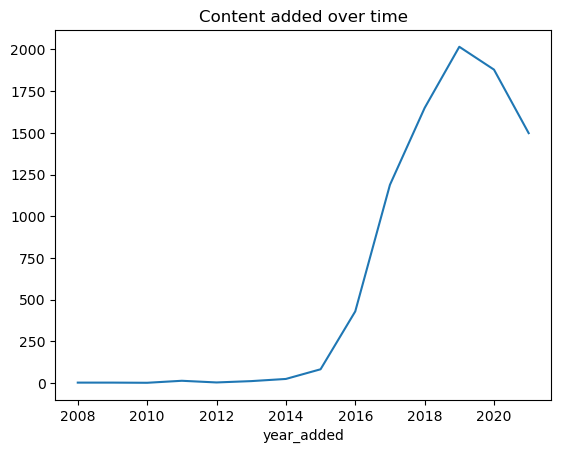

In [272]:
#Analyze netflix content growth over time
import matplotlib.pyplot as plt
df['year_added'].value_counts().sort_index().plot(kind='line')
plt.title("Content added over time")
plt.show()


<Axes: xlabel='type'>

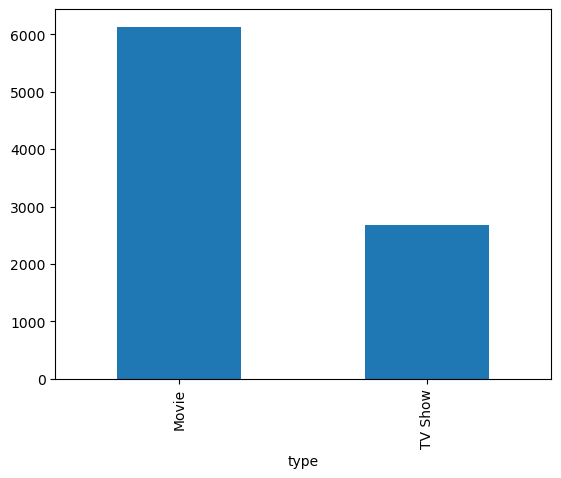

In [238]:
# Visualize the distributions of generes,ratings and content type
df['type'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

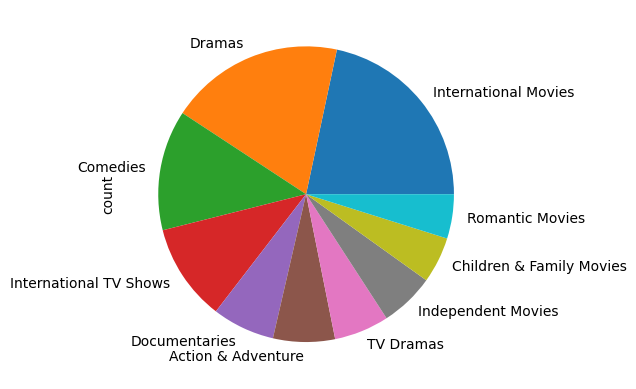

In [260]:
#Visualize the distribution of genres
df_exploded = df.explode('genres')
df_exploded['genres'].value_counts().head(10).plot(kind='pie',color='orange')

<Axes: xlabel='rating'>

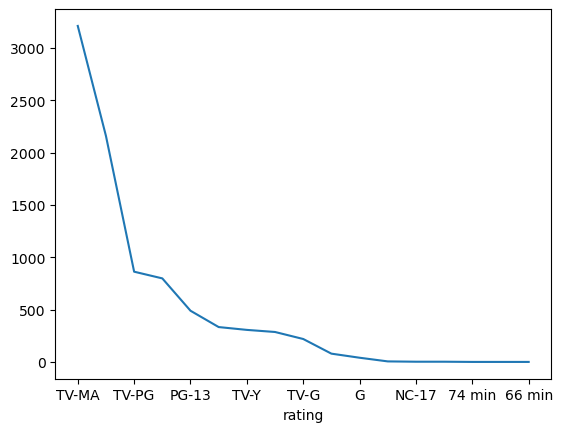

In [270]:
# visaulize the distribution of rating
df['rating'].value_counts().plot(kind='line')

In [302]:
#Country level content distribution
df['country'].value_counts().head(10)

country
United States     3211
India             1008
Unknown            831
United Kingdom     628
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
Mexico             134
Name: count, dtype: int64

In [329]:
# Feature Engineering
# 1.Content lenght Category
df['duration_int'] = df['duration'].str.extract('(\\d+)').astype(float)

def categorize_length(row):
    if row['type'] == 'Movie':
        if row['duration_int'] < 90:
            return 'Short'
        elif row['duration_int'] < 120:
            return 'Medium'
        else:
            return 'Long'
    return 'Series'

df['content_length_category'] = df.apply(categorize_length, axis=1)

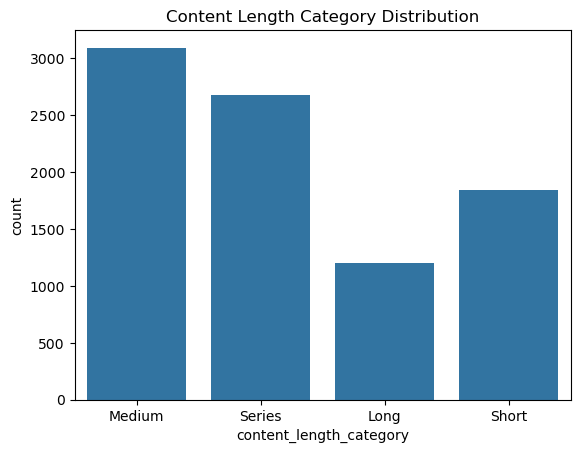

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='content_length_category')
plt.title("Content Length Category Distribution")
plt.show()

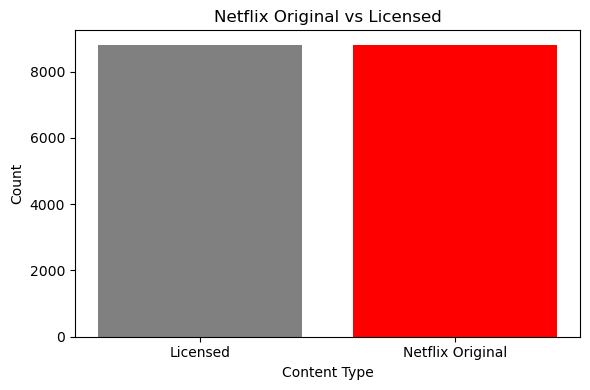

In [341]:
# 2.Original vs Licensed
import matplotlib.pyplot as plt

# Count values (0 = Licensed, 1 = Netflix Original)
counts = df['is_original'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(['Licensed', 'Netflix Original'], counts.values, color=['gray', 'red'])

plt.title("Netflix Original vs Licensed")
plt.xlabel("Content Type")
plt.ylabel("Count")

plt.tight_layout()
plt.show()